In [10]:
import cdflib
import numpy as np

date = '0213'
createdcdf_name = '../CDF-H1_test/1990/ak_h1_mca_1990' + date + '_v02.cdf'
existingcdf_name = '/Document/Akebono_analysis/VLF_mca/Akebono_MCA_data/ak_h1_mca_1990' + date + '_v02.cdf'

created_xary = cdflib.cdf_to_xarray(createdcdf_name)
existing_xary = cdflib.cdf_to_xarray(existingcdf_name)

print(created_xary)
print(existing_xary)


ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Emax, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Eave, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bmax, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bave, but the dimensions do not match.
<xarray.Dataset>
Dimensions:  (record0: 10390, channel: 16, Epoch: 10800)
Coordinates:
  * Epoch    (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
  * channel  (channel) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: record0
Data variables:
    Emax     (record0, channel) uint8 86 95 102 61 68 55 ... 64 53 56 48 42 51
    Eave     (record0, channel) uint8 88 95 98 60 69 47 42 ... 54 49 51 45 36 48
    Bmax     (record0, channel) uint8 167 174 162 154 148 141 ... 94 88 85 80 87
    Bave     (record0, 

In [3]:
import cdflib

for date in ['0201', '0202', '0203', '0204', '0205', '0206', '0207', '0208', '0209', '0210',
             '0211', '0212', '0213', '0214', '0215', '0216', '0217', '0218', '0219', '0220',
             '0221', '0222', '0223', '0224', '0225', '0226', '0227', '0228']:

    print(date)
    cdf_name = '../CDF-H1_test/1990/ak_h1_mca_1990' + date + '_v02.cdf'
    x_array = cdflib.cdf_to_xarray(cdf_name)

    print(x_array)


0201
<xarray.Dataset>
Dimensions:  (Epoch: 10800, channel: 16)
Coordinates:
  * Epoch    (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
  * channel  (channel) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Data variables:
    Emax     (Epoch, channel) uint8 91 96 95 91 87 79 66 ... 68 63 55 46 55 55
    Eave     (Epoch, channel) uint8 93 97 95 88 82 73 64 ... 62 56 50 43 52 52
    Bmax     (Epoch, channel) uint8 127 117 125 121 122 122 ... 90 82 78 75 71
    Bave     (Epoch, channel) uint8 130 120 119 120 123 122 ... 84 76 71 70 72
    PostGap  (Epoch) uint32 32 32 0 0 0 32 32 0 0 0 32 ... 0 0 0 0 0 32 32 0 0 2
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-MCA data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                2
    Descriptor:                  MCA > multi channel analyzer
    Discipline:                  Space Physics > Magne

In [5]:
x_array['PostGap']

<xarray.DataArray 'PostGap' (Epoch: 345598)>
array([4294967294,          0, 4294967294, ...,          0, 4294967294,
                0], dtype=uint32)
Coordinates:
  * Epoch    (Epoch) float64 -1e+30 6.28e+13 -1e+30 ... 6.28e+13 -1e+30 6.28e+13
Attributes:
    CATDESC:        Post Gap Quality Flag
    DEPEND_0:       Epoch
    DICT_KEY:       FLAG > post_gap
    FIELDNAM:       Post Gap Quality Flag
    FILLVAL:        [0]
    FORMAT:         %d
    VALIDMAX:       [2147483647]
    VALIDMIN:       [0]
    VAR_NOTE:       The Quality flag of MCA data.\n 0  : normal\n 1  : MCA of...
    VAR_TYPE:       data
    standard_name:  Post Gap Quality Flag

In [4]:
import pytplot
import cdflib
import sys
import numpy as np
sys.stdout = open("../execute/createdcdf_to_tplot_check.txt", "w")

for date in ['0201', '0202', '0203', '0204', '0205', '0206', '0207', '0208', '0209', '0210',
             '0211', '0212', '0213', '0214', '0215', '0216', '0217', '0218', '0219', '0220',
             '0221', '0222', '0223', '0224', '0225', '0226', '0227', '0228']:
    h0cdf_name = '../CDF-H0/1990/ak_h0_mca_1990' + date + '_v01.cdf'
    h1cdf_name = '../CDF-H1/1990/ak_h1_mca_1990' + date + '_v02.cdf'
    h0cdf = cdflib.CDF(h0cdf_name)
    print(date)

    variables = ['Epoch', 'bitrate','Emax', 'Bmax', 'Eave', 'Bave',
    'E_axis', 'E_WIDA', 'B_WIDA', 'PostGap']

# 変数の名前を指定して、その変数に関連するdimensionを取得
    for var in variables:
        var_array = h0cdf.varget(var)
        print("Variable: ", var)
        print("Dimensions: ", np.shape(var_array))

    pytplot.cdf_to_tplot(h1cdf_name)

sys.stdout.close()


/tmp/ipykernel_2276/2736468461.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../execute/createdcdf_to_tplot_check.txt' mode='w' encoding='UTF-8'>
  sys.stdout = open("../execute/createdcdf_to_tplot_check.txt", "w")


In [32]:
sys.stdout.close("../execute/createdcdf_to_tplot_check.txt")

In [9]:
import pytplot
import cdflib
import numpy as np

date_ = '0211'
h1cdf_name_ = '../data/CDF-H1_test1/1990/ak_h1_mca_1990' + date_ + '_v02.cdf'
h1cdf_ = cdflib.CDF(h1cdf_name_)
print(date_)

variables_ = ['Epoch','Emax', 'Bmax', 'Eave', 'Bave', 'PostGap']

# 変数の名前を指定して、その変数に関連するdimensionを取得
for var_ in variables_:
    var_array = h1cdf_.varget(var_)
    print("Variable: ", var_)
    print("Dimensions: ", np.shape(var_array))

pytplot.cdf_to_tplot(h1cdf_name_)



0211
Variable:  Epoch
Dimensions:  (10800,)
Variable:  Emax
Dimensions:  (10800, 16)
Variable:  Bmax
Dimensions:  (10800, 16)
Variable:  Eave
Dimensions:  (10800, 16)
Variable:  Bave
Dimensions:  (10800, 16)
Variable:  PostGap
Dimensions:  (10800,)


['Emax', 'Eave', 'Bmax', 'Bave', 'PostGap']

In [ ]:
xarray = cdflib.cdf_to_xarray

In [7]:
import cdflib
import pytplot
date = '0201'
cdf_name = '../data/mgf_CDF-H0/ak_h0_mgf_19900201_v01.cdf'
created_xary = cdflib.cdf_to_xarray(cdf_name)
created_xary
# pytplot.cdf_to_tplot(cdf_name)


<xarray.Dataset>
Dimensions:  (Epoch: 172799, dim0: 3, dim1: 16)
Coordinates:
  * Epoch    (Epoch) float64 0.0 0.0 6.28e+13 ... 6.28e+13 6.28e+13 6.28e+13
Dimensions without coordinates: dim0, dim1
Data variables:
    B0       (Epoch, dim0, dim1) float32 -1e+31 -1e+31 ... 2.738e+03 2.738e+03
    B0_spin  (Epoch, dim0, dim1) float32 -1e+31 -1e+31 ... 2.738e+03 2.738e+03
    B0_fa    (Epoch, dim0, dim1) float32 -1e+31 -1e+31 ... 3.119e+03 3.12e+03
    Label_B  (dim0) <U5 'B_X0B' 'B_Y0B' 'B_Z0('
Attributes: (12/21)
    Acknowledgement:             AKEBONO VLF-MGF data were provided by Akebon...
    ADID_ref:                    NSSD0241
    Data_type:                   H0 > High resolusin Data
    Data_version:                1.0
    Descriptor:                  MGF
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    PI_name:                     I. Nagano
    Project:                     .
    Rulus_of_use:                 In order to confirm the reliability of the ...
    source_name:                 Akebono > Akebono satellite
    Time_resolution:             0.5 [sec]
    TITLE:                       Akebono PFX High Resolution data.

B0 静止衛星座標系
B0_spin spinほどく前　
B0_fa 背景磁場方向をz軸に取る

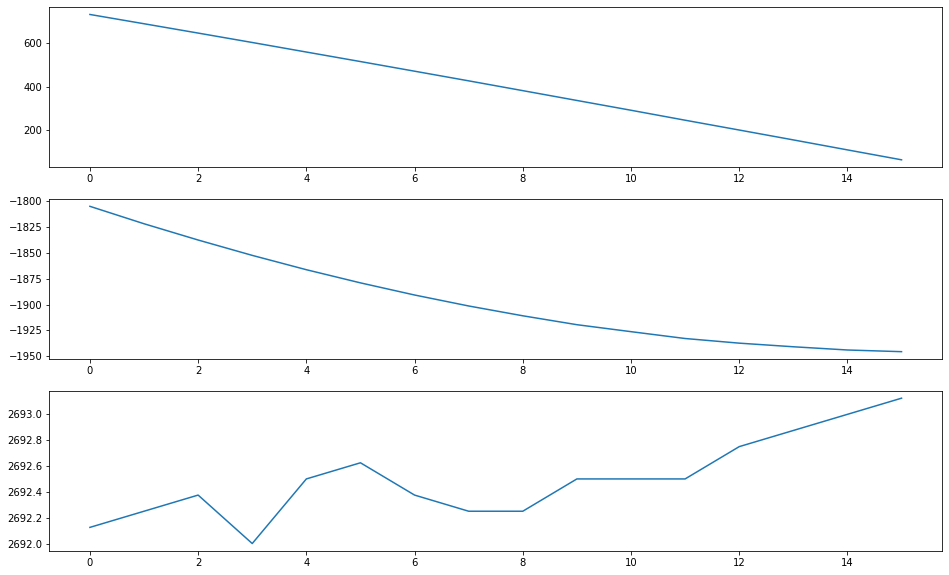

In [23]:
import matplotlib.pyplot as plt
B0_array = created_xary['B0_spin'].data
B0_array[10]

time = np.arange(0, B0_array[10][0].size)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))
axs[0].plot(time, B0_array[10][0])
axs[1].plot(time, B0_array[10][1])
axs[2].plot(time, B0_array[10][2])